# K Nearest Neighbour Regression

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import GridSearchCV

## Importing the dataset

In [ ]:
dataset = pd.read_csv('stock_dataset.csv')
df= dataset[(dataset != 0).all(1)]


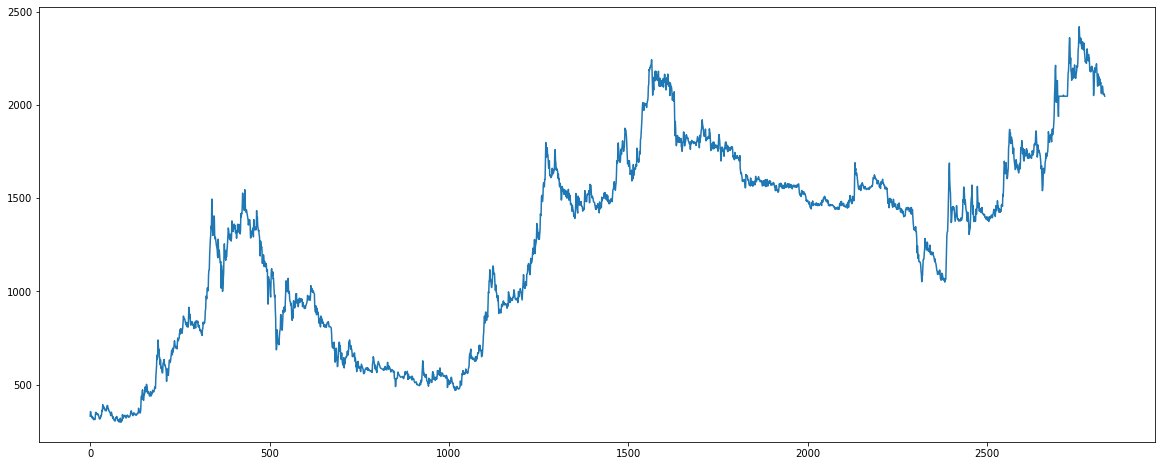

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(df['last_traded_price'], label='Traded Price history')

## Splitting the dataset into the Training set and Test set

In [ ]:
train = df[:2175]
test = df[2175:]

x_train = train.drop(['last_traded_price', 'trading_code', 'date'], axis=1)
y_train = train['last_traded_price']
x_test = test.drop(['last_traded_price', 'trading_code', 'date'], axis=1)
y_test = test['last_traded_price']


## Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)
x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

## Training the KNN on the Training set

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(x_train, y_train)
model = GridSearchCV(knn, params, cv=5)

#Fit and Make predictions





In [ ]:
model.fit(x_train,y_train)
y_pred = model.predict(x_test)


#Results






In [ ]:
rms=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(y_pred)),2)))
print (rms)

398.5962810848331


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

-0.2316335361789219

#Visualization






Text(0.5, 1.0, 'Actual vs predicted')

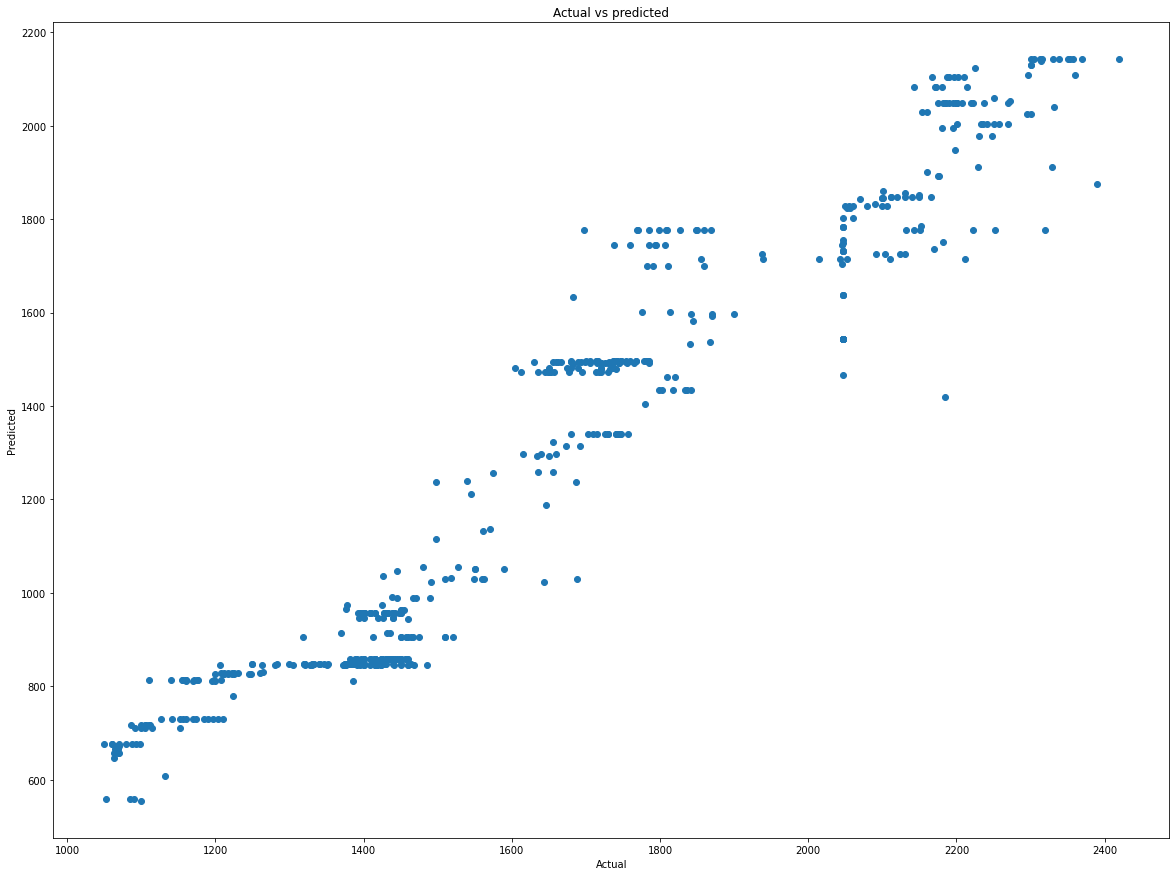

In [ ]:
plt.figure(figsize=(20,15))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs predicted')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


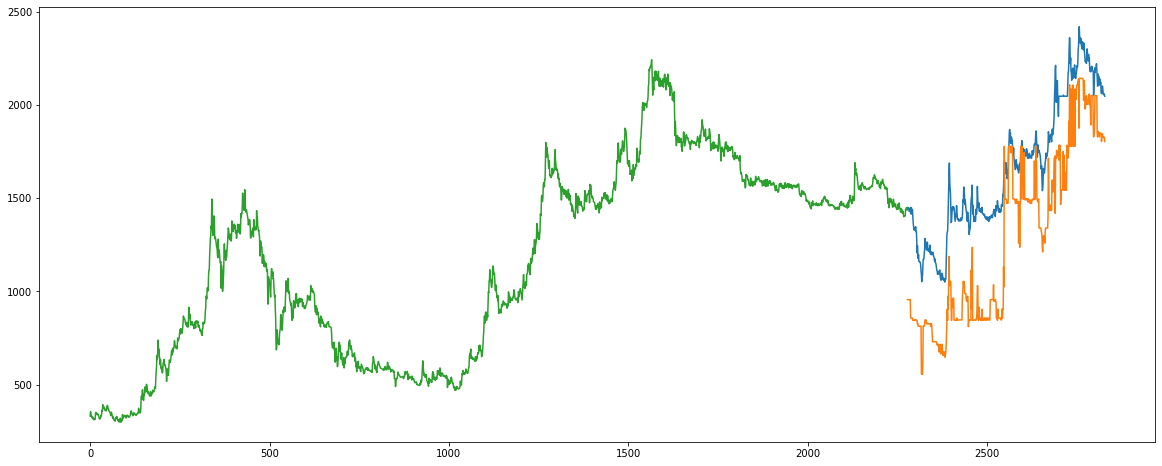

In [ ]:
test['Predictions'] = 0
test['Predictions'] = y_pred
plt.figure(figsize=(20,8))
plt.plot(test[['last_traded_price', 'Predictions']])
plt.plot(train['last_traded_price'])